# Introduction au traitement du signal 
# Travaux Pratiques 2

>**L'objectif de ce TP est d’illustrer le cours sur la théorie de l’échantillonnage, le théorème de Shannon et les aspects pratiques de la transformée de Fourier. Nous nous intéresserons en particulier aux signaux sonores (à bande limitée).**

In [1]:
from __future__ import division

import warnings
warnings.filterwarnings('ignore')


import pylab as pyl
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

    # Import custom functions
import utils

    # Import audio tools
from IPython.display import Audio


import scipy as scp

    # Plot figure inside notebook
%pylab inline

    # For external code
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Partie 0 : Transformée de Fourier, échantillonnage et repliement

On travaille avec des signaux à bande limitée par $F_{max} = 2000$ Hz que l'on étudie sur une durée $T = 1$s . On considère la somme de 2 signaux sinusoidaux $s_1(t)$ de fréquence $f_1 = F_{max}/10$ et $s_2(t)$ de fréquence $f_2 = 10/13 * F_{max}$. 

Soit $s(t) = s_1(t) + s_2(t)$. Le but de cette partie est de mettre en évidence les conséquences d'un échantillonnage adapté ou non au contenu du signal (présence d'aliasing lorsque $F_e$ est trop faible).

In [2]:
Fmax = 2000   # bande de frequence des signaux utilises
T = 1         # duree du signal

On considère des versions "continues" (suréchantillonnées) de ces
signaux qui serviront de référence théorique dans les représentations graphiques 

In [4]:
Fmax= 2000
Fec = Fmax*50 # very high frequency, "continuous"
t   = np.linspace(0,1.0,num=Fec)  # pour définir une liste de 50*Fmax*T échantillons de 0 à T
s1 = 0.5*np.cos(2*np.pi*Fmax/10*t)    # valeurs de s1 aux instants t
s2 = 0.5*np.cos(2*np.pi*10*Fmax/13*t) #  valeurs de s2 aux instants t
s  = s1 + s2

On va écouter maintenant les sons : s1, s2, s.

Pour cela, IPython.display.Audio vous permet de lire de l'audio directement dans un notebook IPython. https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#module-IPython.display

 **Instruction :** Écoutez le signal avec le $rate$ Fec défini ci-dessus.

In [10]:
# Coder ici
Audio(s, rate=Fec)

### 0.1 Echantillonner sans aliasing (repliement)

On échantillonne tout d'abord les signaux avec une fréquence d'échantillonnage $F_{e1} = 2F_{max}$ 

In [7]:
Fe1  = 2*Fmax                      # 1ere frequence d'echantillonnage 
te   = np.linspace(0,T,num=Fe1*T)  # pour définir une liste de Fe1*T échantillons de 0 à T
s1e  = 0.5*np.cos(2*np.pi*Fmax/10*te)        # valeurs de x1 aux instants t
s2e  = 0.5*np.cos(2*np.pi*10*Fmax/13*te)     # valeurs de x2 aux instants t
se   = s1e + s2e

On peut alors écouter les versions échantillonnées comparée à sa version (quasi) continue 

 **Instruction :** Écoutez le signal à la fréquence d'échantillonnage $Fe_1$ définie ci-dessus.

In [11]:
# Coder ici
Audio(se, rate=Fe1)

On trace maintenant ces signaux (version quasi continue et échantillonnée).

Pour cela, on ne représente graphiquement que sur **une durée de $0.005$s au lieu de $1$s**.

Text(0.5, 1.0, 's pour Fe2 = 2*Fmax')

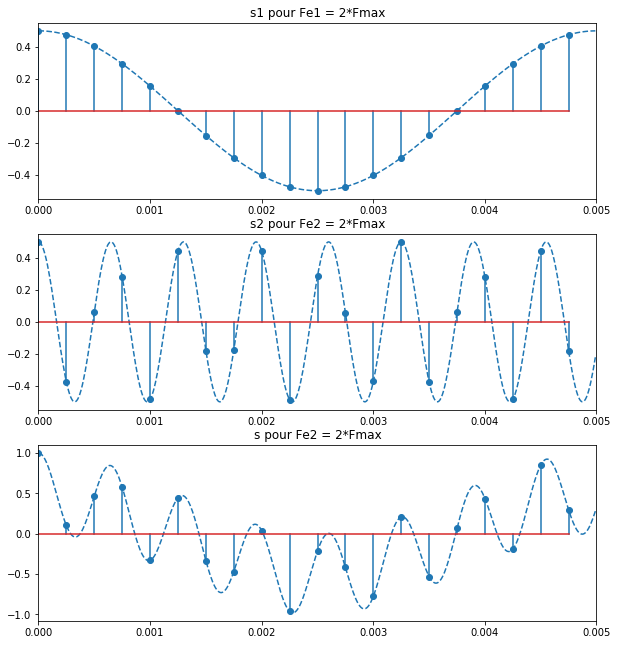

In [14]:
tmax = 0.005
ind  = np.where(t<tmax)       # pour extraire les indices des instants t<tmax 
ind_e  = np.where(te<tmax)    # pour extraire les indices des instants te<tmax

plt.figure(figsize = (10,11))  
plt.subplot(3,1,1)              
plt.plot(t[ind],s1[ind],'--')   # version interpolée continue
plt.stem(te[ind_e],s1e[ind_e])  # version échantillonnée
plt.xlim((0,0.005))
plt.title('s1 pour Fe1 = 2*Fmax')

plt.subplot(3,1,2)
plt.plot(t[ind],s2[ind],'--')   # version interpolée continue
plt.stem(te[ind_e],s2e[ind_e])  # version échantillonnée
plt.xlim((0,0.005))
plt.title('s2 pour Fe2 = 2*Fmax')

plt.subplot(3,1,3)
plt.plot(t[ind],s[ind],'--')   # version interpolée continue
plt.stem(te[ind_e],se[ind_e])  # version échantillonnée
plt.xlim((0,0.005))
plt.title('s pour Fe2 = 2*Fmax')

**Question :**
- Que constatez-vous ? Expliquez pourquoi.

On veut maintenant afficher le signal dans les domaines fréquenciel.

**Instruction :**
Pour cela, dans le fichier $utils.py$, implémentez :

- une fonction $fourier\_transform$ qui prend comme entrées un signal et une fréquence d'échantillonnage et renvoie comme sortie sa transformée de Fourier centrée sur $0$, un vecteur des fréquences allant de $-\frac{Fe}{2}$ à $\frac{Fe}{2}$ nécessaire à cette transformée de Fourier. (Hint: utilisez le module fft de scipy)

- une fonction $fourier\_transform\_positif$ qui prend comme entrées un signal et une fréquence d'échantillonnage et renvoie comme sortie sa transformée de Fourier dans la partie fréquence positive entre $0$ et $Fe$, un vecteur des fréquences allant de $0$ à $Fe$ nécessaire à cette transformée de Fourier.

**Instruction :**
Illustrez la tranformée de Fourier du signal $s_{1e}$ :
- centrée sur 0 allant de $-\frac{Fe_1}{2}$ à $\frac{Fe_1}{2}$
- entre 0 et $Fe_1$

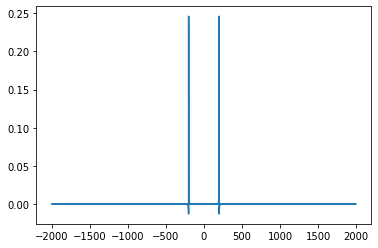

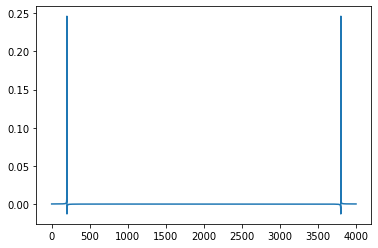

In [22]:
#Coder ici
xhat, freq = utils.fourier_transform(s1e, Fe1)
plt.plot(freq, np.real(xhat))
xhat, freq = utils.fourier_transform_positif(s1e, Fe1)
plt.figure()
plt.plot(freq, np.real(xhat))

**Question :**
- Que représentent les pics dans les graphiques? 
- Que représente le pic à droite sur la graphique illustrée la transformée de Fourier dans la partie fréquence positive entre $0$ et $Fe$ ? Que faudrait-il ajouter au signal pour le faire disparaître ? tester.

**Instruction :**
Illustrez maintenent la tranformée de Fourier du signal $s_{e}$ centrée à $0$

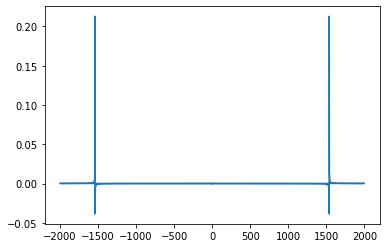

In [24]:
#Coder ici
xhat, freq = utils.fourier_transform(s2e, Fe1)
plt.plot(freq, np.real(xhat))

**Question :**
Que constatez-vous ? Expliquer.

### 0.2 Echantillonner avec aliasing (repliement)

On choisit maintenant d'utiliser la fréquence d'échantillonnage $Fe_2 = F_{max} = 2000$ Hz. On construit les nouvelles versions des signaux $s_1$, $s_2$ et $s$ échantillonnés à cette fréquence.

In [25]:
Fe2   = Fmax                        # frequence d'echantillonnage Shannon
tbis  = np.linspace(0,T,num=Fe2*T)  # pour définir une liste de Fe2*T échantillons de 0 à T
s1ebis = 0.5*np.sin(2*np.pi*Fmax/10*tbis)        # valeurs de x1 aux instants t
s2ebis = 0.5*np.sin(2*np.pi*10*Fmax/13*tbis)     # valeurs de x2 aux instants t
sebis  = s1ebis + s2ebis

 **Instruction :** 
 - Écoutez les signal à la fréquence d'échantillonnage $Fe_2$ définie ci-dessus.
 - Comparez avec les versions précédentes. Que constatez-vous ?

In [27]:
#Coder ici
Audio(s2ebis, rate=Fe2)

**Instruction :**
Illustrez maintenent la tranformée de Fourier du signal $s_{ebis}$ centrée à $0$.


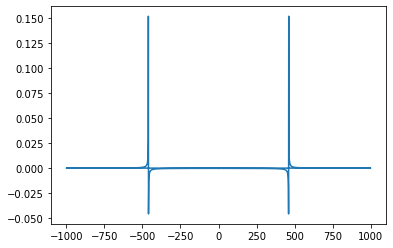

In [28]:
#Coder ici
xhat, freq = utils.fourier_transform(s2ebis, Fe2)
plt.plot(freq, np.real(xhat))


**Question :**
Que constatez-vous ? Expliquer pourquoi.

## Partie 1 : Fréquence d'échantillonnage à l’acquisition ou à la lecture

### Charger, écouter, afficher un signal
Les signaux sonores sont des vecteurs 1D. 

Pour lire un signal : la fonction $load\_sound$ dans $utils.py$  mise à votre disposition permet de charger
simplement un certain nombre de signaux.

La liste des signaux disponibles dans le dossier *audio* est: 
- bird.wav
- glockenspiel.wav 
- female.wav
- male.wav


In [ ]:
############## NE PAS MODIFIER #################
n = 2**15   # nombre d'échantillons                                      
################################################

**Instruction :** chargez les n=$2^{15}$ premiers échantillons du signal son "bird" en utilisant la fonction 𝑙𝑜𝑎𝑑_𝑠𝑜𝑢𝑛𝑑

In [ ]:
# Coder ici


In [ ]:
############## NE PAS MODIFIER #################
Fe = 15000   # fréquence d'échantillonnage                                          
################################################

 **Instruction :** Écoutez maintenant le signal à la fréquence d'échantillonnage $Fe$ définie ci-dessus.

In [ ]:
#Coder ici




**Questions :**
- À quoi correspond le paramètre $Fe$ ?
- Que se passe-t-il lorsqu’on diminue $Fe$ sans changer le signal ?



**Instruction :** Écoutez le même signal en diminuant la fréquence d'échantillonnage par 3 par exemple. Vous pouvez également jouer en changeant le facteur de diminuation.


In [ ]:
#Coder ici
facteur = 3




**Question :**
- Que constatez-vous ? Expliquez pourquoi.

On veut maintenant afficher le signal dans les domaines temporel et fréquenciel.

**Instruction :**
Pour cela, dans le fichier $utils.py$, implémentez :

- une fonction $define\_times$ qui prend comme entrées le nombre d'échantillons et la fréquence d'échantillonnage et renvoie comme sortie un vecteur de temps associé.

- une fonction $inverse\_fourier\_transform$ qui prend comme entrées la transformée de Fourier (centrée en 0) d'un signal et une fréquence échantillonnée et renvoie comme sortie le signal dans le domain de temps et un vecteur de temps associé à cette représentation temporelle.

**Instruction :** 
Illustrez : avec une fréquence d'échantillonnage $Fe$ puis $Fe/3$

- Le signal chargé (dans le domaine temporel) avec le temps associé (lié à la fréquence d'échantillonnage), 
- La transformée de Fourier centrée en 0 du signal échantillonné,
- La transformée de Fourier inverse. 


Faite le lien avec les observations de la question précédente.

In [ ]:
#Coder ici









**Question :**

Quelle manipulation proposez-vous sur le signal afin de corriger le phénomène observé tout en gardant la fréquence d'échantillonnage $Fe/3$?


In [ ]:
# Coder ici




## Partie 2 : Analyse par morceaux
**OBJECTIF** : calculer la transformée de Fourier de différents segments du signal autour de plusieurs instants $n_k$ et la représenter en module pour mettre en évidence les variations du contenu fréquentiel du signal au cours du temps.
Pour cela, nous considérons la transformée de Fourier du signal $s \times w$ où $w$ est fonction fenêtre centrée sur $n_k$. 

### 2.1 Influence du type de fenêtre

Nous analysons tout d'abord l'effet des deux fenêtres suivantes : "porte" et "gaussienne". Pour rappel, le TF d'une porte est un sincardinal et le TF d'une fonction Gaussienne définie par
$$ x(t) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-t^2 / (2\sigma^2)} $$
est donnée par
$$ \mathcal{F}x(f) = e^{-2\sigma^2\pi^2 f^2} $$

(Remarque: contrairement au cours, la transformée de Fourier est exprimée comme une fonction de la fréquence et non de la pulsation).



**Instruction** : Représenter la TF d'un morceau du signal "bird" avec 
une largeur $L = 801$ échantillons centré sur $n_0=1000$.

- Tout d'abord, le morceau en utilisant une porte
- Ensuite le morceau en utilisant une gaussienne de $\sigma = 200$

In [ ]:
############## NE PAS MODIFIER ###############  
N = 400                                     ##
L=2*N+1                                     ##                                        
##############################################

In [ ]:
#Coder ici








**Questions :**
Que constatez-vous ? Expliquer pourquoi.

### 2.2 Influence de la largeur (durée) de la fenêtre
En gardant le même nombre d'échantillons, afficher la fenêtre gaussienne pour différentes valeurs de sigma (50, 100 ,200 et 250) ainsi qu'un exemple de segment de signal  pour une localisation fixée.



In [ ]:
# Coder ici 











**Question :**
Que constatez-vous ? Expliquer pourquoi.

### 2.3 Analyse par morceaux

**Instruction :**  Pour $\sigma=200$, écrire une boucle **for** permettant de répéter l'analyse ci-dessus pour des segments de signal autour de plusieurs instants nk, par exemple de $nk=200$ à $nk=5000$ par pas de $200$. On représentera aussi tous ces spectres ensemble sur un seul et même graphique. 

In [ ]:
# Coder ici 








**Question :**
Que remarquez-vous ? 

## Partie 3 :  Introduction à l'analyse temps-fréquence

### 3.1 Transformée de Fourier à fenêtre : spectrogramme & reconstruction
Pour obtenir une représentation qui permette de suivre l'évolution du contenu fréquentiel du signal au cours du temps, on définit la notion de _transformée de Fourier à fenêtre_, ou _Short Term Fourier Transform_ en anglais. Cette transformée possède $2$ indices, un pour l'instant sur lequel la fenêtre est centrée et un pour les fréquences.

Schématiquement, on obtient la TF à fenêtre en rassemblant dans une même représentation les spectres calculés sur des segments de signal successifs. L'intérêt de cette représentation est de rassembler des transformées de Fourier locales (axe fréquentiel vertical) calculées sur des fenêtres temporelles régulièrement espacées (axe temporel horizontal) : en traduisant le carré de l'amplitude de cette TF à fenêtre par une échelle de couleur, on en déduit le **spectrogramme**. Le carré de l'amplitude de la transformée de Fourier à fenêtre s'interprète comme une densité d'énergie temps-fréquence.

En général, les fenêtres se superposent en temps (overlap) ce qui entraîne une certaine redondance qui est aussi source d'une bonne lisibilité de l'information temps-fréquence. Cette représentation redondante peut s'inverser pour reconstruire le signal d'origine, on parle d'une _pseudo-inverse_.  On peut aussi montrer que l'énergie est conservée, ce que nous illustrerons numériquement. 

Les paramètres d'un spectrogramme sont le type de fenêtre choisi, la taille de la fenêtre  et le pas de temps entre 2 fenêtres successives. 

Ici, la fonction **perform_stft** fournie avec le TP permet de calculer simplement la transformée de Fourier à fenêtre (dite aussi "à court terme") d'un signal. 

La fonction **plot_spectrogram** fournit une représentation graphique dont l'axe vertical correspond aux fréquences (positives seules) échantillonnées entre $0$ et $Fe/2$ et l'axe horizontal aux échantillons temporels. 

Il faut noter que les transformées sont calculées sur des intervalles de temps de largeur |width| espacés régulièrement  tous les |spacing| échantillons. 

Voici un exemple :

In [ ]:
from nt_toolbox.perform_stft import *
from nt_toolbox.plot_spectrogram import *

In [ ]:
############## NE PAS MODIFIER ###############
n = 1024*16  # nombre d'échantillons        ##
Fe = 15000   # Fréquence d'échantillonnage  ##
s = utils.load_sound("audio/bird.wav",n)    ##
##############################################

w = 128   #size of the window
q = w//4  #overlap of the window

S = perform_stft(s,w,q,n)
plt.figure(figsize = (15,20))
plot_spectrogram(S,"Spectrogramme de bird")
plt.show()

**Questions:** 
- Qu'obtenez-vous ? Expliquez en quelques phrases le spectrogramme obtenu.
Expliquer à quoi correspondent les indices sur les axes horizontaux et verticaux du spectrogramme. 
- Comment doit-on les lire et les interpréter (préciser les unités de temps et de fréquence associées).
- Essayez pour différentes valeurs de w (taille de fenêtre) : 128 et 512. Que constatez-vous ?

### 3.2 L'introduction à la séparation des sources
**OBJECTIF** : Nous avons deux sources de signal (ici les sons) qui se mélangent (par exemple, enregistrement par un micro).
On obtient un signal observée (signal mélangée).
A partir de ces données observées, on essaie de retrouver les signaux de différentes sources au départ.

**Instruction** :
- Charger deux sources de son : "bird" et "glockenspiel".
- Normaliser pour que les amplitudes soient sur la même échelle.
- Mélanger les deux sources par le simple opérateur addition, on s'appelle le signal mélangé $y_{add}$ 
- Ecouter le signal mélangé $y_{add}

In [ ]:
#Coder ici







**Analyse le signal mélangé : $y_{add}$**
- Représenter graphiquement le signal $y_{add}$ dans le temps puis son spectre (TF) **centré à $0$**
- Représenter également son spectrogramme avec : 
  - la taille de la fenêtre : w = 128
  - le pas de temps entre 2 fenêtres : q = w//4  

In [ ]:
#Coder ici






**Question:** Que constatez-vous ? 

**Séparation en utilisant des filtres** :
On veut ensuite récupérer séparément ces deux sources à partir du signal mélanger en utilisant les filtres féquentielles. Pour rappel, on a 4 types de filtres standards :
- Filtre passe-bas : https://fr.wikipedia.org/wiki/Filtre_passe-bas
- Filtre passe-haut : https://fr.wikipedia.org/wiki/Filtre_passe-haut
- Filtre passe-bande : https://fr.wikipedia.org/wiki/Filtre_passe-bande
- Filtre coupe-bande : https://fr.wikipedia.org/wiki/Filtre_coupe-bande


**Instruction** : dans le fichier $utils.py$, implémentez ces 4 filtres:

- une fonction $low\_pass$ qui prend comme entrées un signal dans le domaine de fréquence, son vecteur de fréquence associé, une fréquence de coupure et renvoie comme sortie le signal filtré dans le domaine de fréquence.

- une fonction $hig\_pass$ qui prend comme entrées un signal dans le domaine de fréquence, son vecteur de fréquence associé, une fréquence de coupure et renvoie comme sortie le signal filtré dans le domaine de fréquence.

- une fonction $band\_pass$ qui prend comme entrées un signal dans le domaine de fréquence, son vecteur de fréquence associé, deux fréquences de coupure et renvoie comme sortie le signal filtré dans le domaine de fréquence.

- une fonction $band\_stop$ qui prend comme entrées un signal dans le domaine de fréquence, son vecteur de fréquence associé, deux fréquences de coupure et renvoie comme sortie le signal filtré dans le domaine de fréquence.

#### 3.2.1 Estimer première source (bird) :
**Instruction** : 
- Proposer une solution pour estimer la première source (récuppérer le spectre de la première source)
- Représenter (Dessiner) le spectre de la source estimée et le spectre de la vraie source

In [ ]:
#Coder ici






**Instruction :**  Donner le vecteur qui représente les amplitudes dans le temps de la source estimée. Puis l'écouter.

In [ ]:
# Coder ici



**Instruction :**  Écouter la vrai source  pour comparer.

In [ ]:
# Coder ici



**Instruction :** Dessiner **(dans le temps)** sur la même figure la source initiale et la source estimée en utilisant un vecteur $t$ pour le temps.

In [ ]:
# Coder ici




**Instruction:** Représenter également leurs spectrogrammes avec : 
  - la taille de la fenêtre : w = 256
  - le pas de temps entre 2 fenêtres : q = w//8  

In [ ]:
#Coder ici 







#### 3.2.2 Estimer la seconde source : glockenspiel

Traiter avec les mêmes questions de la partie 3.2.1

In [ ]:
#Coder ici



In [ ]:
#Coder ici



In [ ]:
#Coder ici



In [ ]:
#Coder ici



In [ ]:
#Coder ici

